Data analysis for the Franck-Hertz experiment

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avgs = pd.DataFrame()
vals = [6, 65, 7, 75, 8, 85, 9, 95, 10]
for m in vals:

    # read all 5 iterations of the same measurement
    datas_1 = pd.DataFrame(); datas_2 = pd.DataFrame()
    for i in range(0, 5):
        # for channel 1
        data = pd.read_csv(str("data/scov" + str(m) + "_0" + str(i+1) + ".csv"), skiprows = [1])
        datas_1.insert(0, str(i), data["1"])
        datas_2.insert(0, str(i), data["2"])

    # compute mean and sd of the measurements
    res_1 = pd.concat([datas_1.mean(axis = 1), datas_1.std(axis = 1)], axis = 1)
    res_2 = pd.concat([datas_2.mean(axis = 1), datas_2.std(axis = 1)], axis = 1)
    res_m = res_1.join(res_2, lsuffix = "_2")
    res_m.columns = ["mean_1", "sd_1", "mean_2", "sd_2"]
    # create label with decimal point
    if "5" in str(m):
        m_lab = str(str(m)[0] + "." + str(m)[1])
    else:
        m_lab = str(m)
    res_m.insert(0, "finvolt", m_lab)
    
    # combine to one large df for plotting
    if avgs.empty:
        avgs = res_m
    else:
        avgs = pd.concat([avgs, res_m], axis = 0, ignore_index = True)

    # fit minima of channel 1 for three intervalls
    intervals = {"1": [0, 0.006], "2": [0.01, 0.017], "3": [0.021, 0.027]} # chosen visually from plot
        
    # compute distances between minima

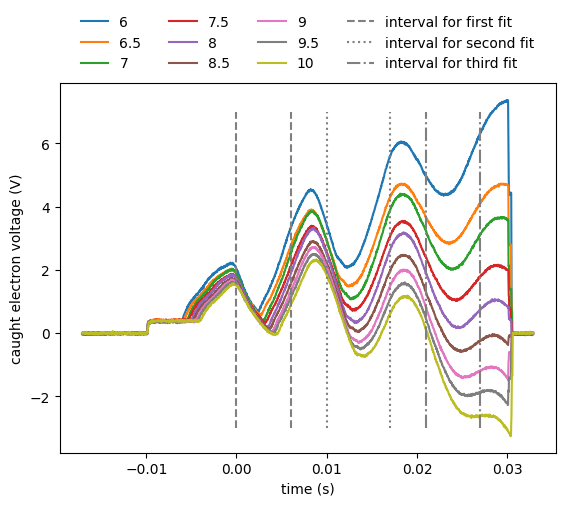

In [62]:
# plot all curves plus decided fit range
avgs.insert(0, "time", np.tile(np.array(data["x-axis"]), len(vals)))
ax = sns.lineplot(avgs, x = "time", y = "mean_1", hue = "finvolt")
plt.vlines(intervals["1"], -3, 7, color = "grey", ls = "--", label = "interval for first fit")
plt.vlines(intervals["2"], -3, 7, color = "grey", ls = ":", label = "interval for second fit")
plt.vlines(intervals["3"], -3, 7, color = "grey", ls = "-.", label = "interval for third fit")
plt.xlabel("time (s)")
plt.ylabel("caught electron voltage (V)")
plt.legend()
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor = (.5, 1), ncol = 4, title = None, frameon = False,
)